In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [2]:
dt=pd.read_csv("\\Users\\piyus\\Downloads\\delivery_time (1).csv")

In [3]:
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dt.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
dt.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
dt_=dt.rename({'Delivery Time':'Delivery','Sorting Time':'Sorting'},axis=1)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery'>

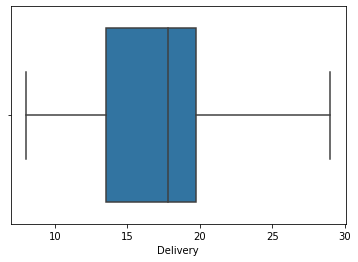

In [10]:
sns.boxplot(dt_['Delivery'])

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting'>

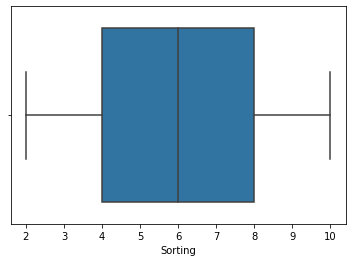

In [14]:
sns.boxplot(dt_['Sorting'])

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

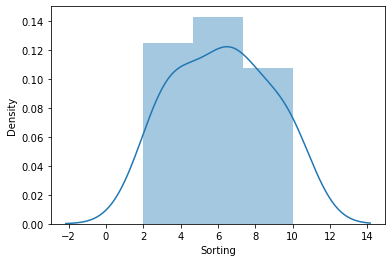

In [18]:
sns.distplot(dt_['Sorting'])

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

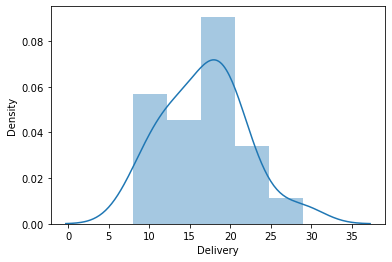

In [19]:
sns.distplot(dt_['Delivery'])

In [20]:
dt_.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


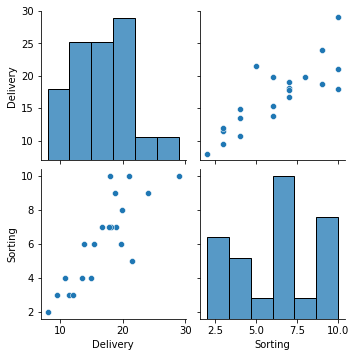

In [21]:
sns.pairplot(dt_)

In [22]:
model=smf.ols("Delivery~Sorting",data=dt_).fit()

In [25]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [27]:
(model.tvalues,'n/',model.pvalues)

(Intercept    3.823349
 Sorting      6.387447
 dtype: float64,
 'n/',
 Intercept    0.001147
 Sorting      0.000004
 dtype: float64)

In [28]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [29]:
(model.aic)

106.71400170798609

In [32]:
model.predict(dt_.iloc[0:10,:])

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
5    16.476853
6    18.125873
7    11.529794
8    23.072933
9    21.423913
dtype: float64